<a href="https://colab.research.google.com/github/prab-tri/BigDataApps/blob/master/ICP03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import required libraries 
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Library to form wordcloud 
from wordcloud import WordCloud, ImageColorGenerator
import requests
from PIL import Image 

#Library to plot :
import matplotlib.pyplot as plt
import seaborn as sns

# Global Parameters
stop_words = set(stopwords.words('english'))
nltk.download("popular")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
#get the Data used and store in variable Data
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [ ]:
#view of top 5 and bottom 5 rows of data
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
#counting distinct vlaue on column 'label'
Data.groupby(['label']).count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


**Data set Decription**

It has 31962 rows and 3 columns.
Columns description  - 
1. id  - Unique id for each tweet given in dataset.
2. label - It has only 2 values either 0 or 1.A tweet with label ‘0’ is of positive sentiment while a tweet with label ‘1’ is of negative sentiment. There are 29720 tweets for positive sentiments and rest for negative, out of 31962 tweets.
3. tweet - The tweets collected from various sources and having either positive or negative sentiments associated with it. 
 


In [ ]:
#Data type of each column
Data.dtypes

id        int64
label     int64
tweet    object
dtype: object

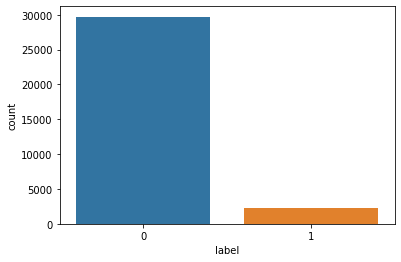

In [ ]:
#countplot  - Category of tweets based on its label
sns.countplot(x= 'label',data = Data)

In [ ]:
#deleting id column
del Data['id']

In [ ]:
Data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Define a function to preprocess the tweets.
1. Change in lower case.
2. Remove the urls from tweet.
3. Remove user refernces and '#' from tweet.
4. Remove punctuations.
5. Remove stopwords after word tokenize.
6. Remove numeric values.
7. stemming and lemmatizing 
8. returning as string



In [ ]:
def preprocess_tweet_text(tweet):
    '''
    input - type str
    return  - type str
    '''
    #change in lower case
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    #print(filtered_words)
    
    #Remove numeric ones
    alpha_words = [w for w in filtered_words if w.isalpha()]
    #print(alpha_words)
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in alpha_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='v') for w in stemmed_words]
    
    return " ".join(lemma_words)

In [ ]:
#dataframe for positive sentiments
Data_positive = Data.loc[Data['label'] == 0]

In [ ]:
#dataframe for negative sentiments
Data_negative = Data.loc[Data['label'] == 1]

In [ ]:
#count for each sentiments
print('Positive Tweets:',Data_positive.count())
print('Negative Tweets',Data_negative.count())

Positive Tweets: label    29720
tweet    29720
dtype: int64
Negative Tweets label    2242
tweet    2242
dtype: int64


In [ ]:
positive_tweet = pd.Series(Data_positive.tweet).to_string()
negative_tweet = pd.Series(Data_negative.tweet).to_string()

In [ ]:
pos_words = preprocess_tweet_text(positive_tweet)
neg_words = preprocess_tweet_text(negative_tweet)

In [ ]:
#length of positive tweet words
len(pos_words)


1098677

In [ ]:
#length of negative tweet words
len(neg_words)

90133

In [ ]:
#Find the frequency for positive tweets:
fdist = FreqDist(pos_words.split(' '))

#Print 10 most common words :
fdist.most_common(10)

[('day', 2383),
 ('love', 2314),
 ('happi', 1819),
 ('get', 1578),
 ('thank', 1409),
 ('go', 1166),
 ('time', 1055),
 ('u', 1046),
 ('make', 1024),
 ('im', 1009)]

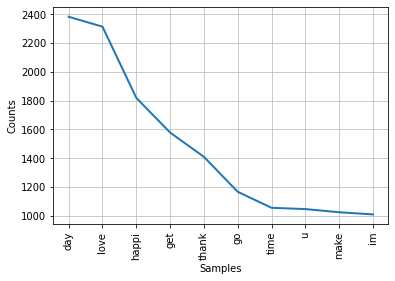

In [ ]:
fdist.plot(10)

In [ ]:
#Find the frequency for negative tweets:
fdist = FreqDist(neg_words.split(' '))

#Print 10 most common words :
fdist.most_common(10)

[('amp', 209),
 ('trump', 158),
 ('libtard', 150),
 ('black', 131),
 ('like', 124),
 ('white', 123),
 ('racist', 91),
 ('liber', 90),
 ('allahsoil', 89),
 ('say', 80)]

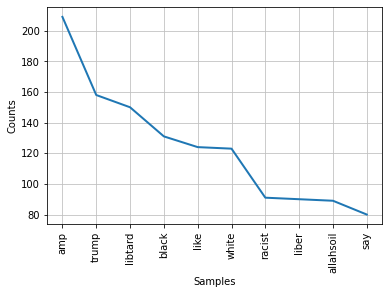

In [ ]:
fdist.plot(10)

Word Cloud for positive tweets

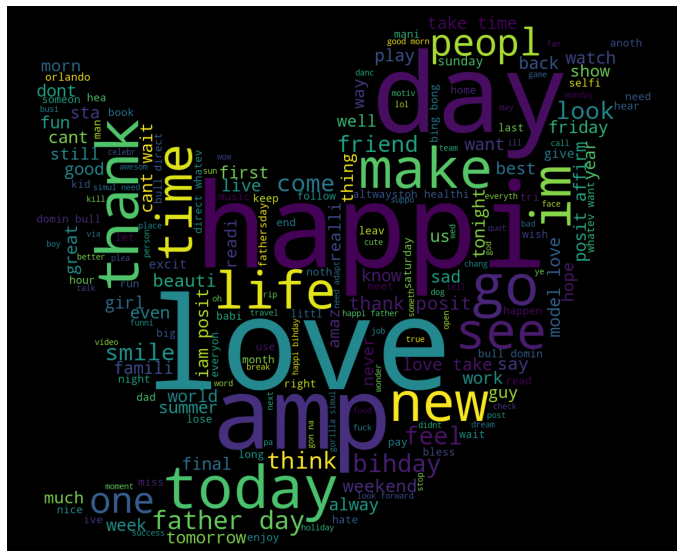

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(pos_words)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

Word Cloud for negative tweets


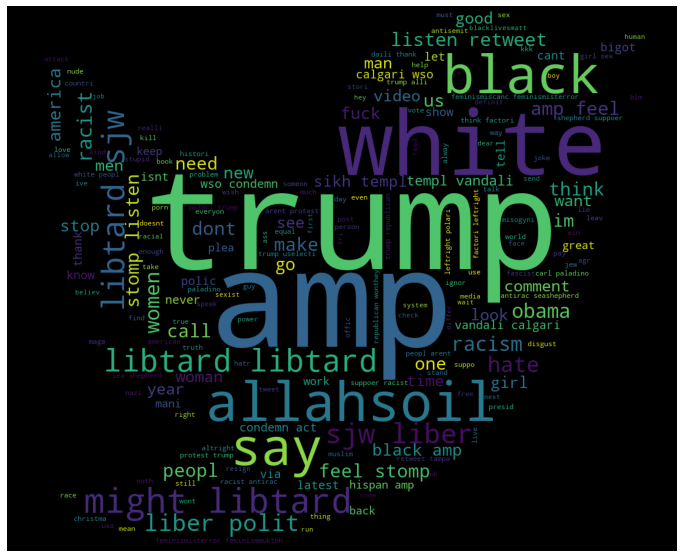

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(neg_words)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

In [ ]:
#Preprocess data
Data.tweet = Data['tweet'].apply(preprocess_tweet_text)

In [ ]:
Data

,label,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit cant use cau dont offer whee...
2,0,bihday majesti
3,0,model love u take u time
4,0,factsguid societi motiv
...,...,...
31957,0,eat isz
31958,0,see nina turner airwav tri wrap mantl genuin h...
31959,0,listen sad song monday morn otw work sad
31960,1,sikh templ vandali calgari wso condemn act


Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

In [ ]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    #print(vector)
    vector.fit(train_fit)
    return vector

Using the dataset as the corpus to make a tf-idf vector. The same vector structure should be used for training and testing purposes.

ravel() - This function returns a flattened one-dimensional array.

In [ ]:
# Same tf vector will be used for Testing sentiments 
tf_vector = get_feature_vector(np.array(Data.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(Data.iloc[:, 1]).ravel())
y = np.array(Data.iloc[:, 0]).ravel()
#splitting data for training the  model and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)




In [ ]:
# Training Logistics Regression model with training data
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Co-efficient and intercept of model
LR_model.intercept_
LR_model.coef_

array([[ 0.        , -0.08918688, -0.0100382 , ...,  0.        ,
        -0.00571761, -0.02873812]])

In [ ]:
# Testing the model using test data
y_predict_lr = LR_model.predict(X_test)
print('Accuracy score of this model is :',accuracy_score(y_test, y_predict_lr)*100, '%')

Accuracy score of this model is : 94.74425152510558 %
